# Data processing

## Objectives

Main: To collect and preprocess datasets that are used for training and evaluation in [kmer based models](Kmer-Memory-Predict/kmer_stats_vs_peak_memory.ipynb) with identified metadata features.

1. Identify and download datasets from public repositories (e.g., ENA, SRA).
2. Build a lightweight API to process FASTQ files and genrate the following stats:
    - File size
    - Number of reads
    - Read length stats (e.g., median, N50, L50)
    - GC content
3. Implement methods to trasform to ML-friendly variables
4. Store processed data in a structured format (e.g., CSV, JSON) for easy access and analysis.

## Objective 1: Identify and download datasets from public repositories (e.g., ENA, SRA).

In [2]:
## Download fastqfiles from `/homes/fragoso/softw/FAIRyMAGs/Kmer-Memory-Predict/updated_mgnify_assemblies_stats_v3.15.3_metaspades_kmer_stats.csv`


In [3]:
### Explore version change distribution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../../../Kmer-Memory-Predict/input/mgnify_assemblies_stats.csv")

In [11]:
change = []
#calculate change percentage of peak_mem_in_gbs
for g,gr in df[(df.assembler == "metaspades")&(df.assembler_version.str.contains("3.15."))].groupby('primary_accession'):
    if len(gr) > 1:
        break
        mem1 = gr.iloc[0]['peak_mem_in_gbs']
        mem2 = gr.iloc[1]['peak_mem_in_gbs']
        if mem1 != mem2:
            change.append((g, mem1, mem2, abs((mem2 - mem1) / mem1 * 100)) )

change_df = pd.DataFrame(change, columns=['primary_accession', 'mem1', 'mem2', 'change_perc'])

<Axes: xlabel='wall_clock_seconds', ylabel='peak_mem_in_gbs'>

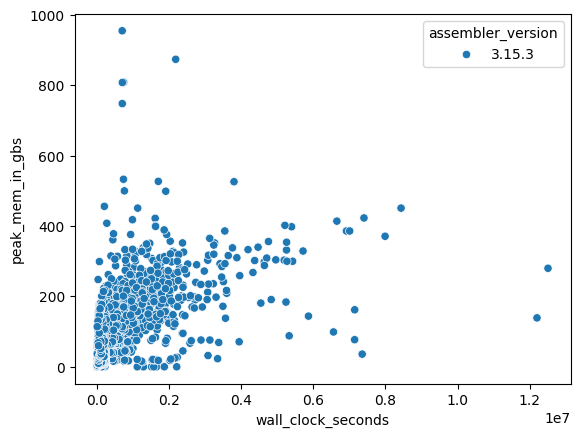

In [14]:
sns.scatterplot(df[(df.assembler == "metaspades")&(df.assembler_version.str.contains("3.15"))],x='wall_clock_seconds',y='peak_mem_in_gbs',hue='assembler_version')

In [8]:
change_df

,primary_accession,mem1,mem2,change_perc
